analyse the data from supra.
/home/eton/00-src/supra/build/data/linearProbe_IPCAI_128-2_0.raw

因为是ASCII的存储方式，所以实际内容就是json的描述的另一种表示，不需要进一步分析。
 /home/eton/00-src/supra/build/data/linearProbe_IPCAI_128-2mock.json

In [2]:
datafile="/home/eton/00-src/supra/build/data/linearProbe_IPCAI_128-2_0.raw"
mockfile="/home/eton/00-src/supra/build/data/linearProbe_IPCAI_128-2.mock"

In [3]:
with open(mockfile, 'r') as f:
    #print(type(f),dir(f),help(f.read))
    line01=f.readline()
    print(line01)
    line02=f.readline()
    print(line02)
    line03=f.readline()
    print("line3 len=", len(line03))
    
    line04=f.readline()
    print("line4 len=", len(line04))


rawDataMockMetadata v 3

128 128 1 64 2337 128 255 1 45 4e+07 2000 1.54e+06

line3 len= 40368
line4 len= 21808


In [4]:
numScanlineX=255
for i in range(numScanlineX):
    print(line03[i])

-
1
8
.
7
5
 
0
 
0
 
0
 
1
 
0
 
1
8
.
6
0
2
3
6
2
2
 
0
 
0
 
0
 
6
3
 
0
 
0
 
8
.
8
0
4
8
9
2
8
5
e
-
0
7
 
1
 
0
 
0
 
6
3
 
0
 
1
 
8
.
2
5
8
0
2
8
3
9
e
-
0
7
 
0
 
0
 
0
 
6
3
 
0
 
0
 
8
.
8
0
4
8
9
2
8
5
e
-
0
7
 
0
 
0
 
0
 
6
3
 
0
 
1
 
8
.
2
5
8
0
2
8
3
9
e
-
0
7
 
0
 
 
-
1
8
.
6
0
2
3
6
2
2
 
0
 
0
 
0
 
1
 
0
 
1
8
.
4
5
4
7
2
4
4
 
0
 
0
 
0
 
6
3
 
0
 
0
 
8
.
8
0
4
8
9
2
8
5
e
-
0
7
 
0
.
5
 
0
 
0
 
6
3
 
0
 
1
 
8
.
2
5
8
0
2
8
3
9
e
-
0
7
 
0
.
5
 
0
 
0
 
6
3
 
0
 
0
 
8
.
8
0
4
8


In [5]:
print("run test.")

run test.


In [17]:
import numpy as np

numSamples=2337
numRxChannel=64
numScanlines=128
numel=numSamples*numRxChannel*numScanlines
sizeofInt16=2
with open(datafile, 'rb') as f:
    buf=f.read(numSamples*sizeofInt16)
oneline=np.array(buf, dtype=np.int16)

print(buf[:64])

ValueError: invalid literal for int() with base 10: b'm\xff\x8d\xff\xaa\xff\xc7\xff\xdd\xff\xf1\xff\xff\xff\x0c\x00\x17\x00\x1d\x00#\x00%\x00(\x00(\x00&\x00$\x00 \x00N\x00\x0e\x00\xf3\xff\xdb\x00\x9e\xff\x0c\xfe\xee\x00L\x02\xdd\x00\xd3\xfdm\xfd\xcf\x0

[147 115  86  57  35  15   1  12  23  29  35  37  40  40  38  36  32  78
  14  13 219  98 244 238  76 221  45 147 207 130 141 138 165  45  30  99
 205 252 247  71 117 213  33 234 183 137  75 147 210 119  74 255 141 151
 138 149 255 255 255 211 188  81 255 255]


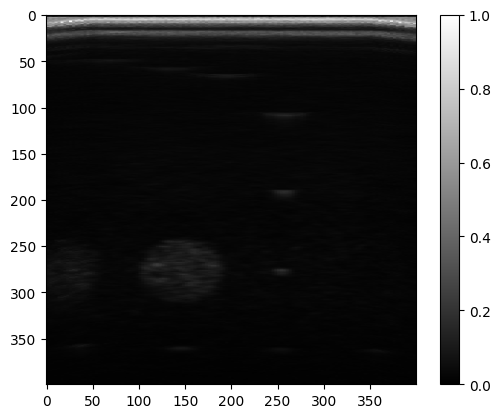

In [25]:
#help(np.int16)
import matplotlib.pyplot as plt
import cv2
import numpy as np

datafile="/home/eton/00-src/supra/build/data/linearProbe_IPCAI_128-2_0.raw"
numSamples=2337
numRxChannel=64
numScanlines=128


def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range


numScanlines=128
alldataRaw=np.fromfile(datafile,dtype = np.int16)
alldata=np.absolute(alldataRaw).astype(np.uint8)
print(alldata[:64])
numoneRx=numRxChannel*numSamples*numScanlines
oneRx=alldata[0:numoneRx]

oneRx.resize(numScanlines, numRxChannel, numSamples)

oneframe =[]

for line in range(numScanlines):
    oneframe.append(np.zeros(numSamples))
    for ch in range(numRxChannel):
        #print(f"debug: line={line}, ch={ch}")
        oneframe[line]+=oneRx[line,ch,:]


#oneRx=oneRx.transpose()
#oneRx.resize(numSamples, numRxChannel*numScanlines)
#oneRx = (oneRx + 2000) /4000

oneframe=np.asarray(oneframe)
oneframe=oneframe.transpose()
oneframe=cv2.resize(oneframe, (400,400), interpolation=cv2.INTER_AREA)
#plt.imshow(oneRx)
plt.imshow( normalization(oneframe))
plt.imshow( normalization(oneframe),cmap='gray')
#plt.imshow( normalization(oneframe),cmap='gray', vmin=0, vmax=255)
#plt.imshow( oneframe,cmap='gray')
#plt.imshow(oneframe)
plt.colorbar()

In [14]:
print(np.int16.__sizeof__)

<method '__sizeof__' of 'numpy.generic' objects>


In [15]:
import sys
sys.getsizeof(np.int16)

424

img size: (400, 58, 3)


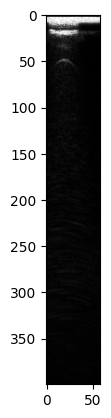

In [10]:
%matplotlib inline

import cv2 
import matplotlib.pyplot as plt

def imgshow(imgfile):
    img = cv2.imread(imgfile)
    print("img size:", img.shape)
    plt.imshow(img)
#cv2.imshow(">", img)
imgshow("/tmp/qtimage.png")


img size: (2337, 64, 3)


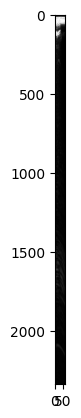

In [11]:
imgshow("/tmp/qtimage0.png")